In [ ]:
%cd /content/
!git clone https://github.com/p-p-p-p/precision_agriculture.git

/content
Cloning into 'precision_agriculture'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 54 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 52.64 KiB | 3.10 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# Get all processed data
csv_list=[]
for csv_file in os.listdir("/content/precision_agriculture/data/processed"):
    if csv_file.endswith(".csv"):
        csv_list.append(f"/content/precision_agriculture/data/processed/{csv_file}")

import pandas as pd
sample_df=pd.read_csv(csv_list[0])
sample_df.head()

,wavelength,reflectance
0,381.450012,0.024033
1,386.459991,0.024484
2,391.470001,0.026179
3,396.470001,0.027498
4,401.480011,0.028860


In [ ]:
#@title Dataset Summary
import pandas as pd
import os
from collections import defaultdict

vegetable_names = []
locations = []
file_stats = []
location_vegetables = defaultdict(list)

for csv_file in csv_list:
    df = pd.read_csv(csv_file)
    base_name = os.path.basename(csv_file)

    # Extract vegetable and location
    vegetable_name = location = "Unknown"
    if "_" in base_name:
        try:
            vegetable_name = base_name.split("_")[-2]
            location = base_name.split("_")[-1].replace(".csv", "")
        except ValueError:
            pass

    vegetable_names.append(vegetable_name)
    locations.append(location)

    # Group vegetables by location
    location_vegetables[location].append(vegetable_name)

    file_stats.append({
        "filename": base_name,
        "vegetable": vegetable_name,
        "location": location,
        "rows": len(df),
        "wavelength_range": f"{df['wavelength'].min()}–{df['wavelength'].max()}"
    })

# Convert to DataFrame for overview
overview_df = pd.DataFrame(file_stats)

# Print summary
print("✅ Total CSV files:", len(csv_list))
print("🥦 Unique vegetables:", sorted(set(vegetable_names)))
print("📍 Unique locations:", sorted(set(locations)))

# Crops per location
print("\n📊 Vegetables available at each location:")
for loc, crops in location_vegetables.items():
    print(f"  {loc} ({len(crops)} crops): {', '.join(sorted(crops))}")

# Detailed summary table
print("\n📄 Detailed file summary:")
display(overview_df)


✅ Total CSV files: 15
🥦 Unique vegetables: ['banana', 'cotton', 'cucumber', 'eggplant', 'legumes', 'mango', 'mustard', 'onion', 'sapota', 'sugarcane', 'tomato', 'wheat']
📍 Unique locations: ['anand', 'jhagdia', 'kota', 'maddur', 'talala']

📊 Vegetables available at each location:
  anand (4 crops): banana, eggplant, legumes, mango
  kota (3 crops): cucumber, mustard, wheat
  talala (2 crops): mango, sapota
  maddur (2 crops): cotton, tomato
  jhagdia (4 crops): banana, onion, sugarcane, wheat

📄 Detailed file summary:


,filename,vegetable,location,rows,wavelength_range
0,spectral_signature_eggplant_anand.csv,eggplant,anand,372,381.450012–2500.120117
1,spectral_signature_cucumber_kota.csv,cucumber,kota,372,381.450012–2500.120117
2,spectral_signature_mango_talala.csv,mango,talala,372,381.450012–2500.120117
3,spectral_signature_tomato_maddur.csv,tomato,maddur,372,381.450012–2500.120117
4,spectral_signature_cotton_maddur.csv,cotton,maddur,372,381.450012–2500.120117
5,spectral_signature_mango_anand.csv,mango,anand,372,381.450012–2500.120117
6,spectral_signature_onion_jhagdia.csv,onion,jhagdia,372,381.450012–2500.120117
7,spectral_signature_sapota_talala.csv,sapota,talala,372,381.450012–2500.120117
8,spectral_signature_mustard_kota.csv,mustard,kota,372,381.450012–2500.120117
9,spectral_signature_banana_anand.csv,banana,anand,372,381.450012–2500.120117


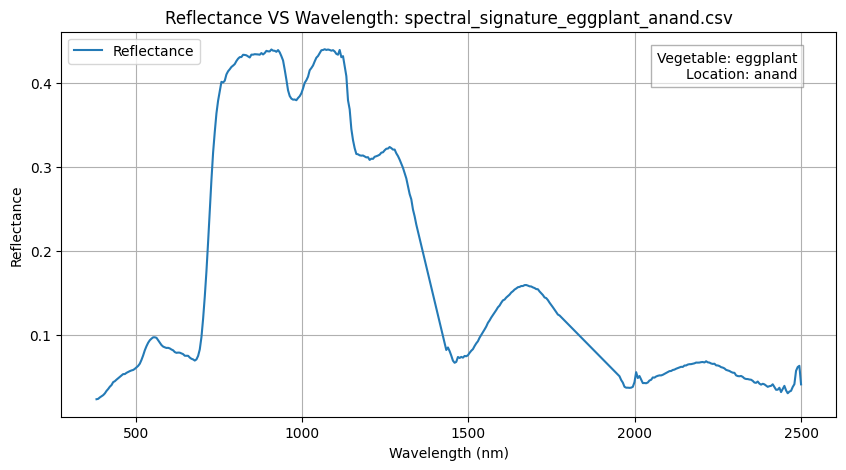

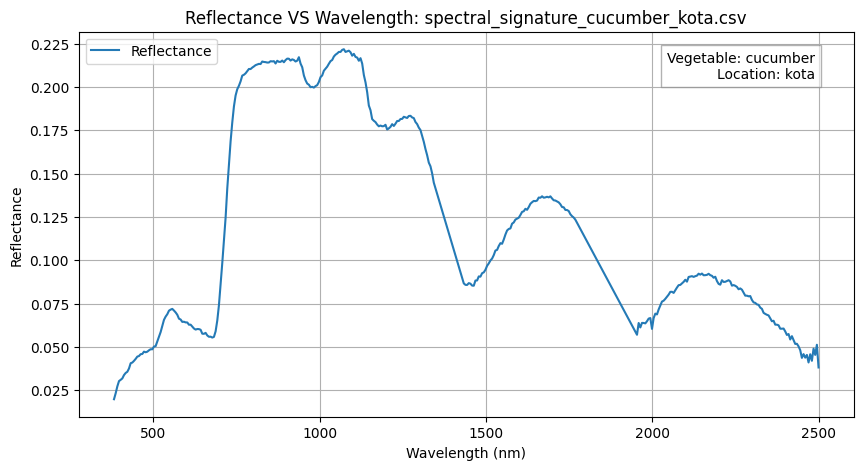

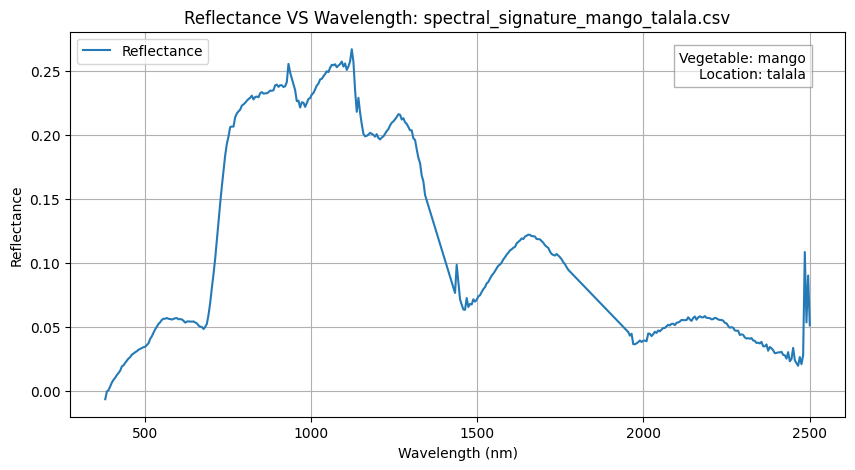

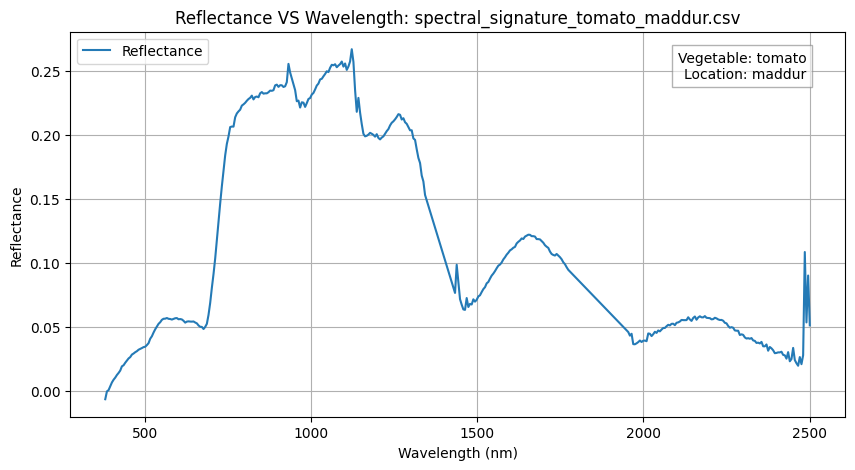

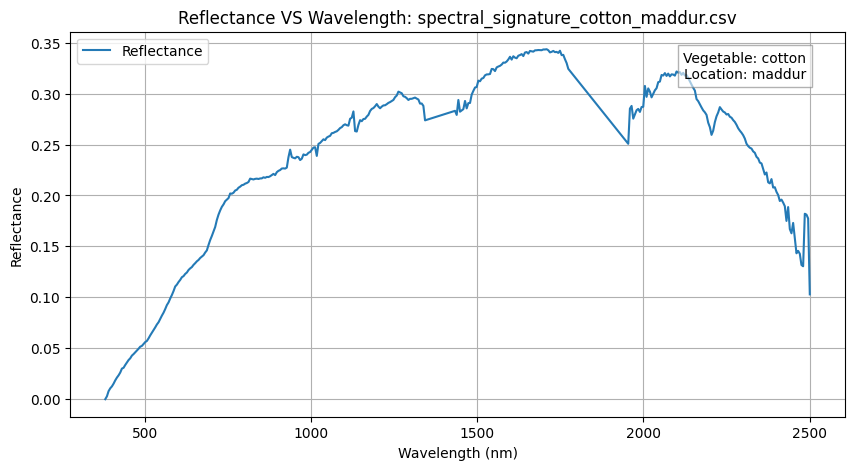

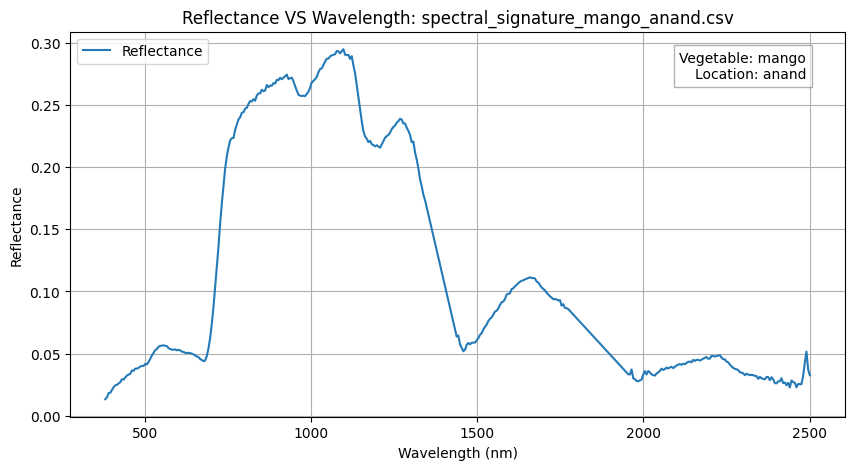

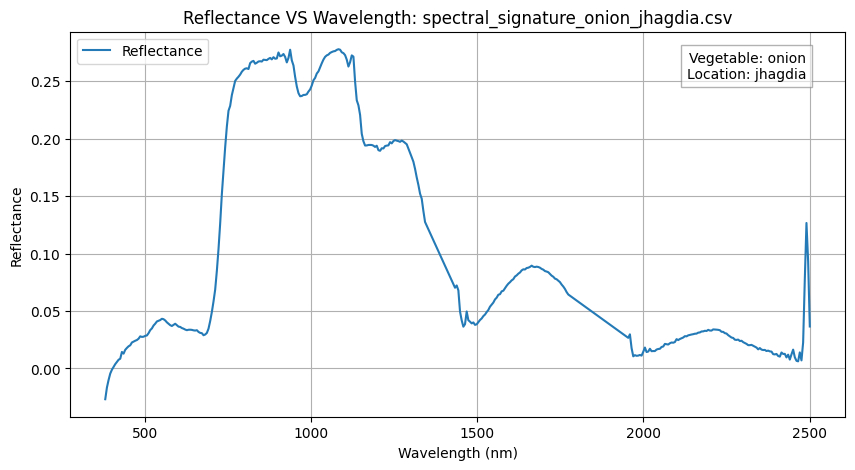

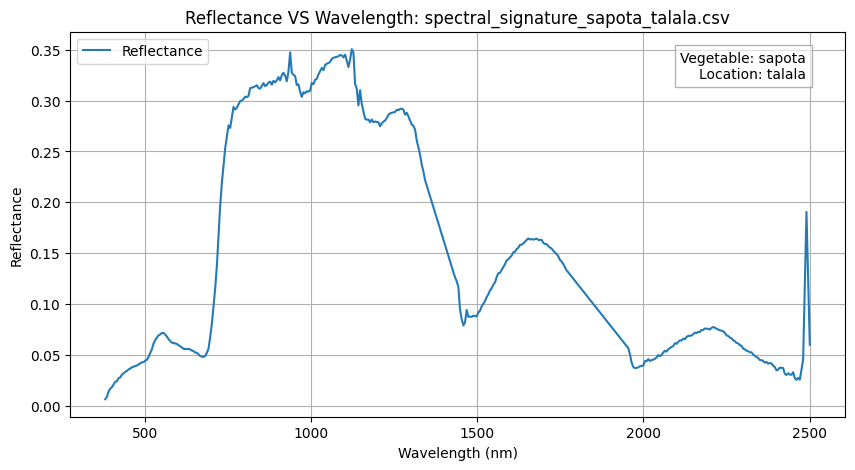

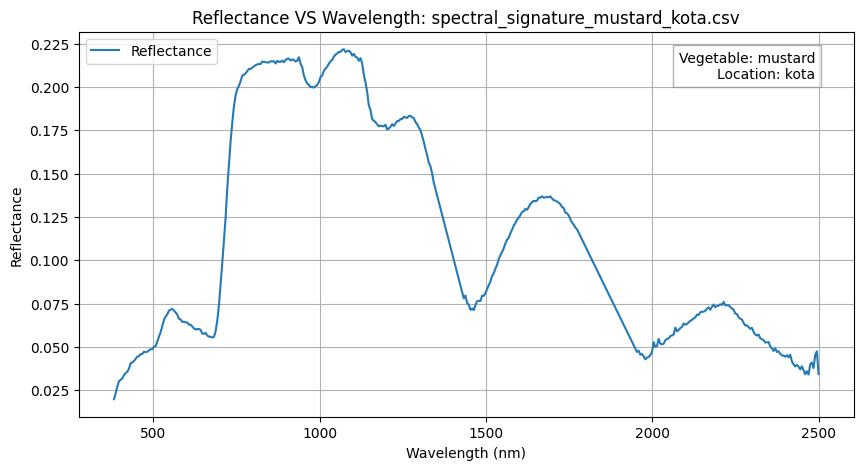

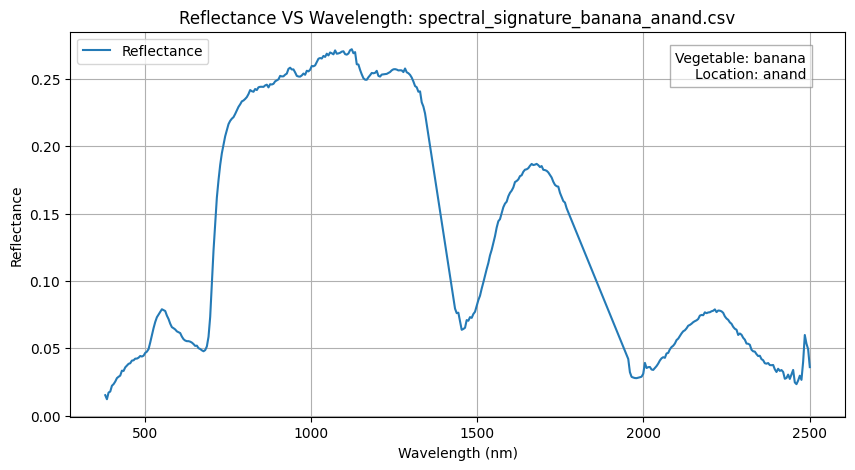

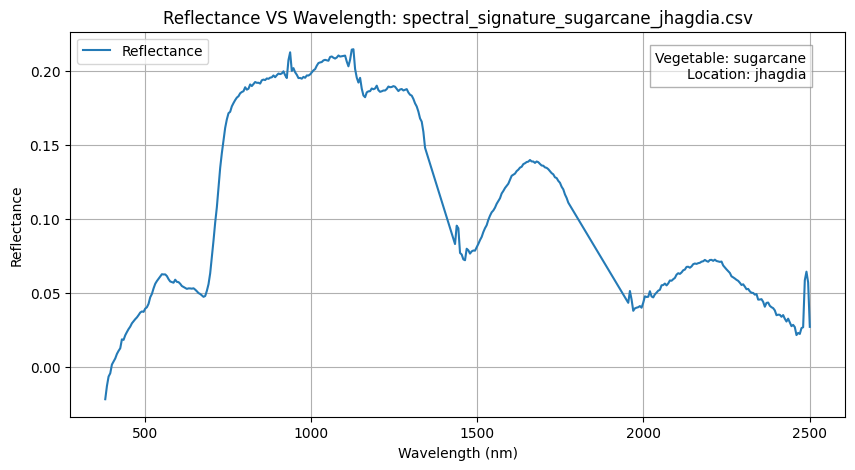

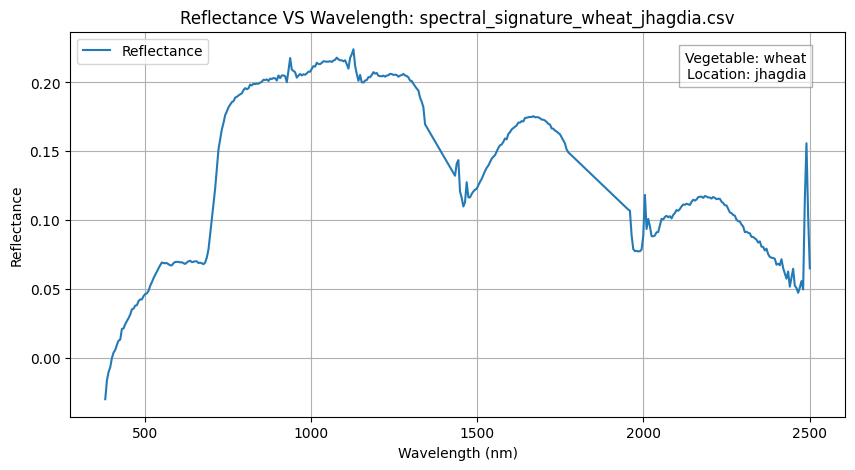

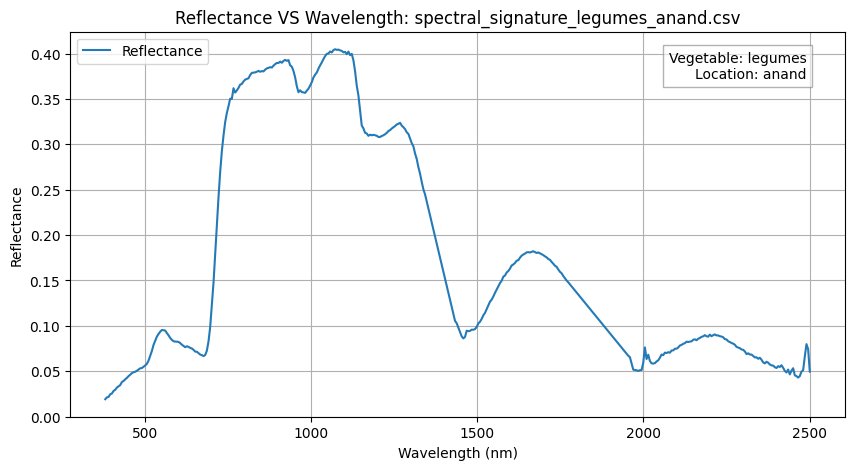

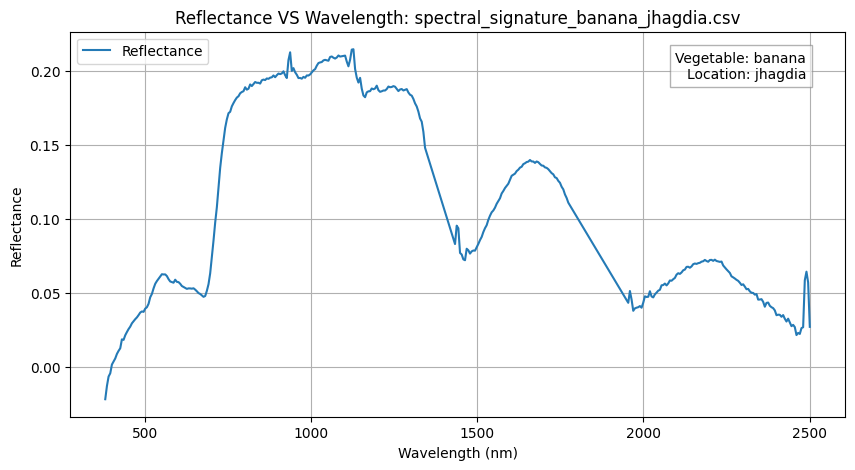

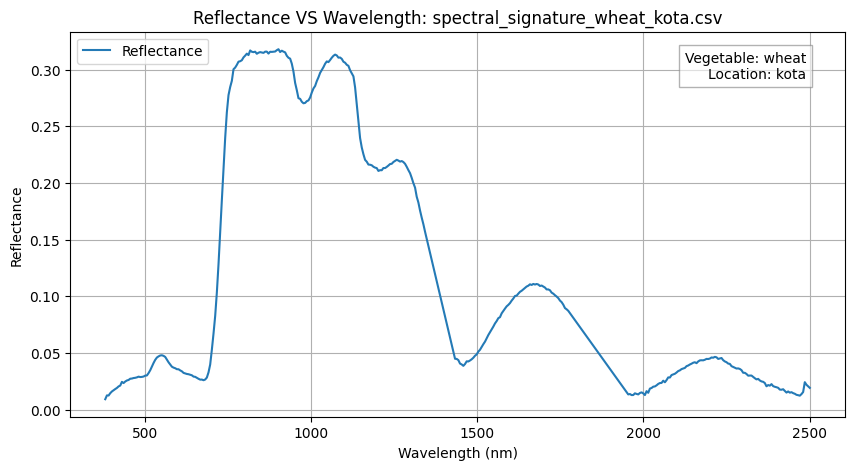

In [ ]:
#@title Plot Reflectance vs Wavelength for All CSV Files

import matplotlib.pyplot as plt
import pandas as pd
import os


def plot_smoothed_reflectance(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Get the base filename
    base_name = os.path.basename(csv_file)

    # Extract vegetable and location info
    vegetable_name = location = "Unknown"
    if "_" in base_name:
        try:
            vegetable_name=base_name.split("_")[-2]
            location = base_name.split("_")[-1].replace(".csv", "")
        except ValueError:
            pass

    # Plot using smoothed reflectance
    plt.figure(figsize=(10, 5))
    plt.plot(df['wavelength'], df['reflectance'], linestyle='-', color='#247ab6', label='Reflectance')

    # Add annotation (top-right corner)
    plt.text(
        0.95, 0.95,
        f"Vegetable: {vegetable_name}\nLocation: {location}",
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
    )

    # Labels and title
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'Reflectance VS Wavelength: {base_name}')
    plt.legend()
    plt.grid()
    plt.show()


# Loop over all files and plot
for file in csv_list:
    plot_smoothed_reflectance(file)


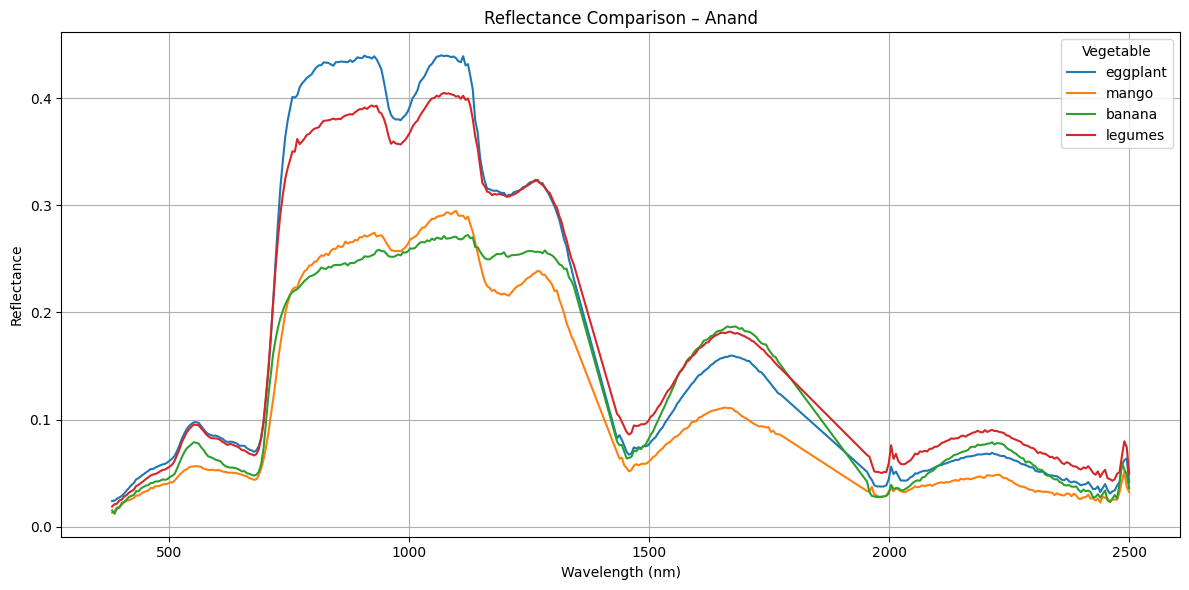

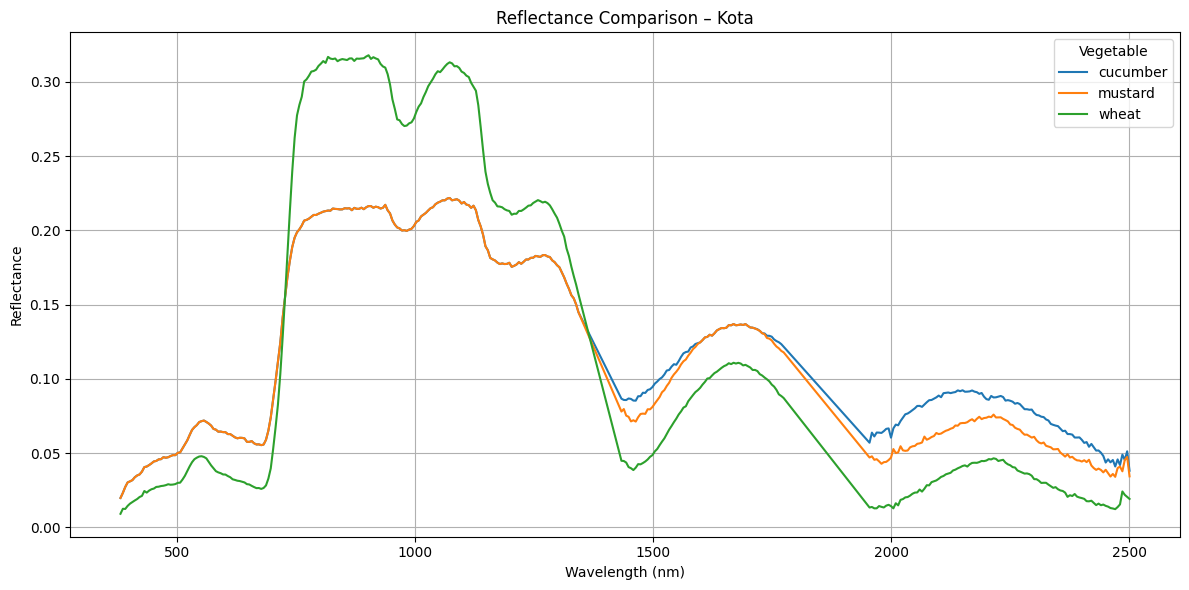

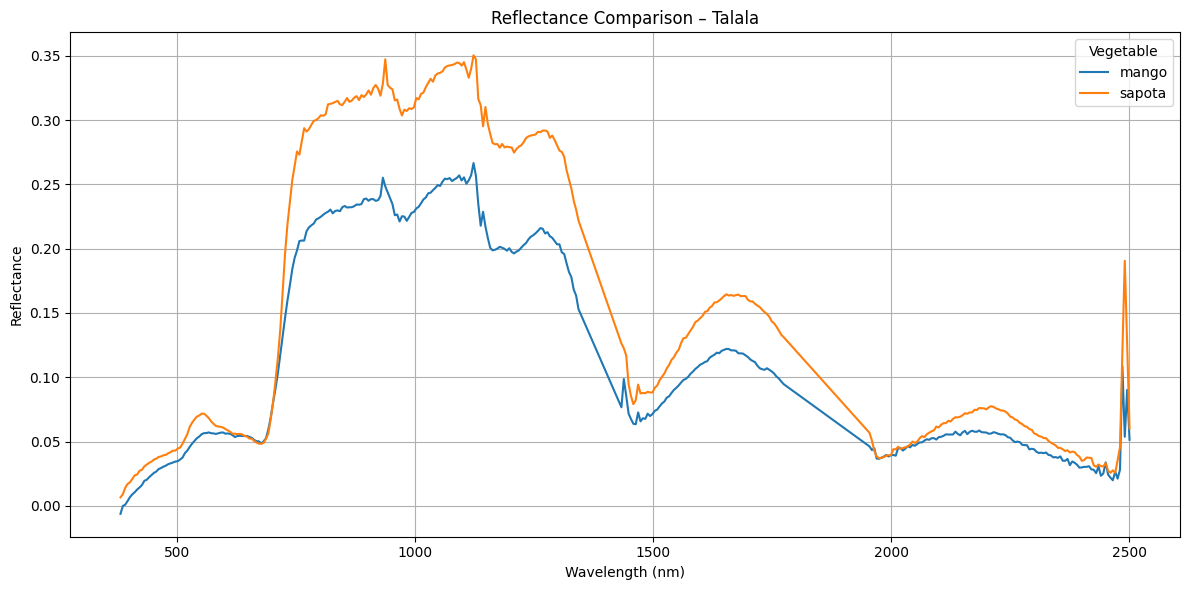

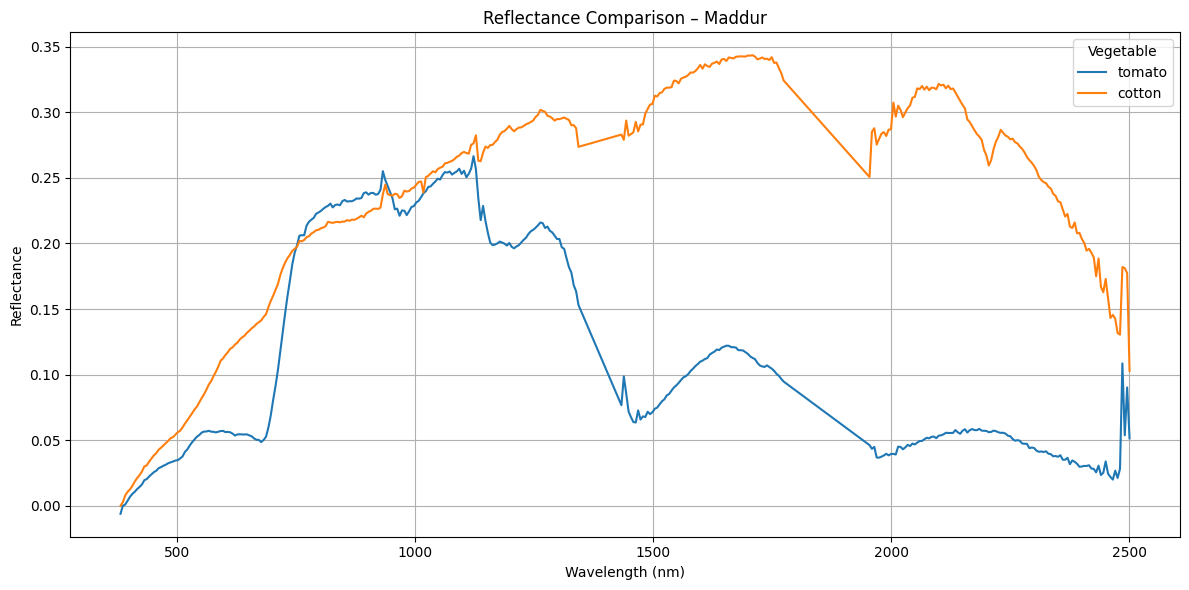

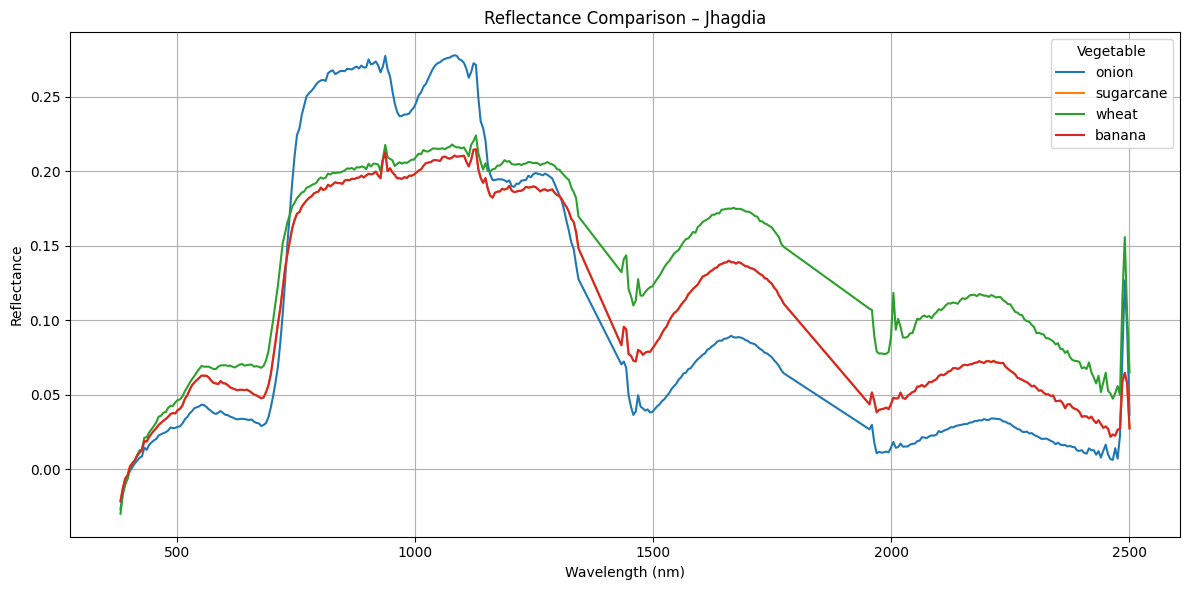

In [ ]:
#@title Compare Reflectance for Vegetables in a Specific Location


import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store file paths grouped by location
df_dict = {}

# Loop through the CSV files and organize them by location and vegetable
for csv_file in csv_list:
    base_name = os.path.basename(csv_file)

    # Remove the 'spectral_signature_' prefix from the base name if it exists
    if base_name.startswith("spectral_signature_"):
        base_name = base_name.replace("spectral_signature_", "")

    # Check if the file name follows the expected format (vegetable_location.csv)
    if "_" in base_name:
        try:
            vegetable_name, location = base_name.split("_")
            location = location.replace(".csv", "")

            # Add the file to the dictionary under the appropriate location
            if location not in df_dict:
                df_dict[location] = {}

            df_dict[location][vegetable_name] = csv_file
        except ValueError:
            print(f"Skipping: {base_name} — doesn't match expected format.")

# Plot for each location
for location, veg_dict in df_dict.items():
    plt.figure(figsize=(12, 6))

    for idx, (vegetable, path) in enumerate(veg_dict.items()):
        # Read the data
        df = pd.read_csv(path)

        # Check if the required columns exist in the dataframe
        if 'wavelength' not in df.columns or 'reflectance' not in df.columns:
            print(f"Missing columns in {path}. Skipping.")
            continue

        # Plot the reflectance vs wavelength
        plt.plot(df['wavelength'], df['reflectance'], label=vegetable)

    # Add plot details
    plt.title(f"Reflectance Comparison – {location.capitalize()}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.legend(title="Vegetable")
    plt.grid()
    plt.tight_layout()
    plt.show()


<ipython-input-44-0f47182c806c>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_files)  # 'tab20' supports up to 20 unique colors


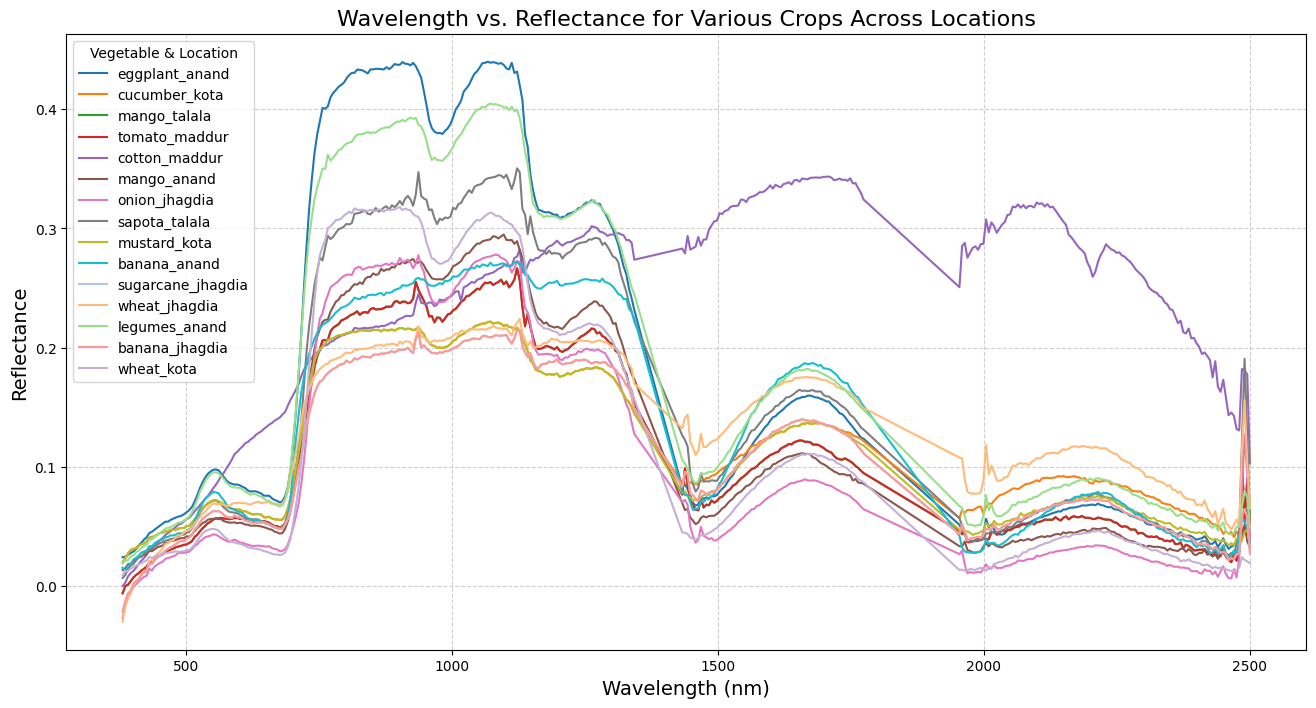

In [ ]:
#@title Full Comparison of Crop Reflectance Across Different Locations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os

# Create the figure
plt.figure(figsize=(16, 8))

# Ensure the number of colors equals or exceeds the number of files
num_files = len(csv_list)

# Use a high-quality colormap for categorical data
cmap = cm.get_cmap('tab20', num_files)  # 'tab20' supports up to 20 unique colors

# Alternatively, define a custom list of colors for better control
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
]

# If there are more files than colors in the custom list, fall back to the colormap
colors = custom_colors if num_files <= len(custom_colors) else [cmap(i % cmap.N) for i in range(num_files)]

for idx, file in enumerate(csv_list):
    df = pd.read_csv(file)
    base_name = os.path.basename(file).replace(".csv", "")

    # Modify the base_name to remove "spectral_signature_" and retain only "vegetable_location"
    base_name = base_name.replace("spectral_signature_", "")  # Remove the prefix

    color = colors[idx]  # Use the custom color or colormap color

    plt.plot(df['wavelength'], df['reflectance'], label=base_name, color=color)  # Plot with updated name

# Labels and Title
plt.title("Wavelength vs. Reflectance for Various Crops Across Locations", fontsize=16)
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Reflectance", fontsize=14)
plt.legend(title="Vegetable & Location", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Vegetable & Location")
plt.show()


In [ ]:
# @title Data Preprocessing: Loading Cleaned Data

import pandas as pd
import os
import numpy as np

# Function to load the pre-cleaned CSV data files
def load_cleaned_data(csv_list):
    data = []  # List to store DataFrames of all the loaded datasets
    for file in csv_list:
        df = pd.read_csv(file)  # Read each CSV file into a DataFrame
        data.append(df)  # Add the DataFrame to the list
    return data

# Load the cleaned data files
df_list = load_cleaned_data(csv_list)

# Display the number of datasets loaded to ensure successful loading
print(f"Loaded {len(df_list)} datasets.")


Loaded 15 datasets.


In [ ]:
# @title Feature Engineering: Extracting Key Reflectance Features

# Function to calculate the peak reflectance and its corresponding wavelength
def get_peak_reflectance(df):
    peak_value = df['reflectance'].max()  # Find the highest reflectance value
    peak_wavelength = df['wavelength'][df['reflectance'].idxmax()]  # Find the wavelength at peak reflectance
    return peak_value, peak_wavelength

# Function to calculate the reflectance slope (derivative) to identify sharp changes
def calculate_slope(df):
    df['slope'] = np.gradient(df['reflectance'], df['wavelength'])  # Compute the gradient (slope) of the reflectance data
    return df

# Function to calculate a simple reflectance band ratio between two spectral bands
def band_ratio(df, band1_range=(600, 700), band2_range=(800, 900)):
    band1 = df[(df['wavelength'] >= band1_range[0]) & (df['wavelength'] <= band1_range[1])]  # Select data within band 1 range
    band2 = df[(df['wavelength'] >= band2_range[0]) & (df['wavelength'] <= band2_range[1])]  # Select data within band 2 range

    reflectance_band1 = band1['reflectance'].mean()  # Compute mean reflectance for band 1
    reflectance_band2 = band2['reflectance'].mean()  # Compute mean reflectance for band 2

    ratio = reflectance_band1 / reflectance_band2  # Calculate the ratio between the two bands
    return ratio

# Example feature extraction for the first dataset
peak_reflectance, peak_wavelength = get_peak_reflectance(df_list[0])  # Extract peak reflectance for the first dataset
df_slope = calculate_slope(df_list[0])  # Calculate slope for the first dataset
ratio = band_ratio(df_list[0])  # Calculate the band ratio for the first dataset

print(f"Peak Reflectance: {peak_reflectance}, Peak Wavelength: {peak_wavelength}")
print(f"Band Ratio (600-700nm / 800-900nm): {ratio}")


Peak Reflectance: 0.439876, Peak Wavelength: 1067.640015
Band Ratio (600-700nm / 800-900nm): 0.1808098713159236


Summary Statistics: {'mean': np.float64(0.17856046774193549), 'median': 0.09202250000000001, 'std': 0.15009607372083839, 'min': 0.024033, 'max': 0.439876}


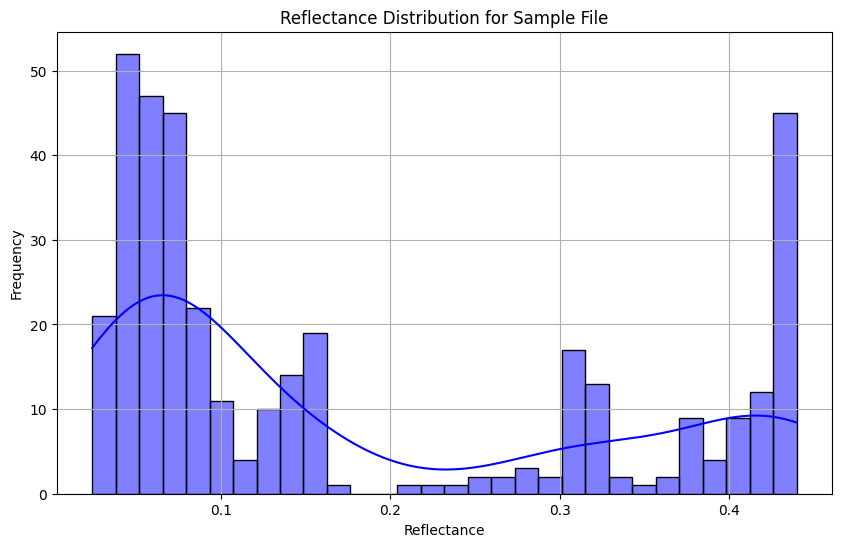

In [ ]:
# @title Statistical Summary & Visualization: Reflectance Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate summary statistics for reflectance values
def get_statistics(df):
    stats = {
        'mean': df['reflectance'].mean(),
        'median': df['reflectance'].median(),
        'std': df['reflectance'].std(),
        'min': df['reflectance'].min(),
        'max': df['reflectance'].max()
    }
    return stats

# Display statistical summary for the first dataset
stats = get_statistics(df_list[0])  # Compute statistics for the first dataset
print("Summary Statistics:", stats)

# Function to visualize the distribution of reflectance values
def plot_reflectance_distribution(df, title="Reflectance Distribution"):
    plt.figure(figsize=(10, 6))  # Set figure size for the plot
    sns.histplot(df['reflectance'], bins=30, kde=True, color='blue')  # Create a histogram with KDE
    plt.title(title)  # Set the title for the plot
    plt.xlabel('Reflectance')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.grid(True)  # Display grid lines for better readability
    plt.show()

# Visualize the reflectance distribution for the first dataset
plot_reflectance_distribution(df_list[0], title="Reflectance Distribution for Sample File")
